# Fetch - Take Home Exercise

- By: Danhong Huang  
- Date: October 28th 2024

In [96]:
# import necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pandasql import sqldf

## 1. Explore Data Analysis
Review the unstructured csv files and answer the following questions with code that supports your conclusions:
- Are there any data quality issues present?
- Are there any fields that are challenging to understand?

### 1.1 Load and Explore Products Data

In [60]:
#load products data
pdt = pd.read_csv('PRODUCTS_TAKEHOME.csv')
pdt.head(20)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
5,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,BEAUHAIR,6.626585e+11
6,Health & Wellness,Medicines & Treatments,Vitamins & Herbal Supplements,NaN,HALEON,EMERGEN-C,6.177376e+11
7,Health & Wellness,Deodorant & Antiperspirant,Men's Deodorant & Antiperspirant,NaN,NaN,NaN,7.501839e+12
8,Snacks,Snack Bars,Granola Bars,NaN,HYVEE INC,HY-VEE,7.545013e+10
9,Health & Wellness,NaN,NaN,NaN,CHURCH & DWIGHT,REPHRESH,NaN


In [11]:
# Number of rows and columns
print(pdt.shape)

# Column data types and non-null values
print(pdt.info())

# Descriptive statistics for numerical columns
print(pdt.describe())

# Basic statistics for categorical columns
print(pdt.describe(include='object'))

(845552, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB
None
            BARCODE
count  8.415270e+05
mean   6.016109e+11
std    1.022530e+12
min    1.850000e+02
25%    7.124923e+10
50%    6.344185e+11
75%    7.683955e+11
max    6.291108e+13
               CATEGORY_1 CATEGORY_2        CATEGORY_3 CATEGORY_4  \
count              845441     844128            784986      67459   
unique                 27        121               344        127   
top     Health & Wellness      Candy 

#### Findings
- **Missing Value**: There are some missing values present in the dataset, which require further investigation to determine the extent and potential impact on analysis.


- **BARCODE Data Type**: The data type of the `BARCODE` field is currently set as an integer, causing it to be automatically displayed in scientific notation due to its length. To address this, it may be beneficial to convert the data type to `VARCHAR` to ensure readability and preserve accuracy.


- **Column Name Confusion**: The column name `BARCODE` could also be reconsidered, as it may not fully capture the nature of the identifier. Renaming it to something more descriptive, such as `PRODUCT_ID`, could help make the data more intuitive and easier to understand.


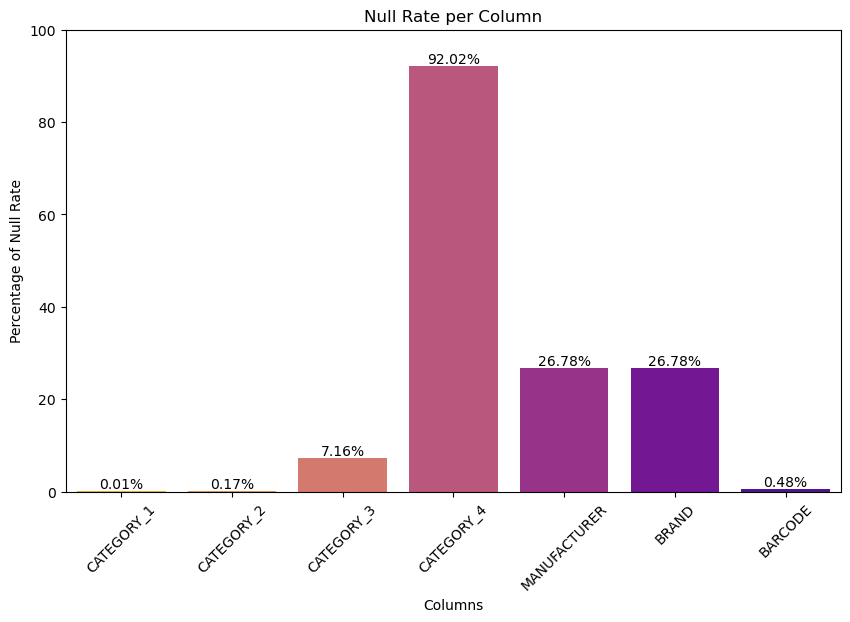

In [36]:
# plot null rate

# Calculate null rate as a percentage
null_rate = pdt.isnull().mean() * 100

# Create bar plot for null rate
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=null_rate.index, y=null_rate.values, hue=null_rate.index, palette="plasma_r")

plt.ylabel('Percentage of Null Rate')
plt.xlabel('Columns')
plt.title('Null Rate per Column')
plt.ylim(0, 100)  # Limit the y-axis from 0 to 100 for better readability
plt.xticks(rotation=45)

# Add numerical values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [43]:
# check NONE value
pdt_1 = pdt[pdt['MANUFACTURER'] == 'NONE']
# pdt_2 = pdt[pdt['CATEGORY_2'] == 'NONE']

display(pdt_1)
# display(pdt_2)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
10,Health & Wellness,Hair Care,Hair Care Accessories,NaN,NONE,SEGO,4.643201e+10
179,Health & Wellness,Hair Care,Hair Care Accessories,NaN,NONE,SEGO,7.280480e+11
414,Health & Wellness,Hair Care,Hair Care Accessories,NaN,NONE,SEGO,7.280480e+11
416,Health & Wellness,Hair Care,Hair Care Accessories,NaN,NONE,SEGO,7.227948e+11
445,Health & Wellness,Hair Care,Hair Care Accessories,NaN,NONE,SEGO,7.227948e+11
...,...,...,...,...,...,...,...
844746,Health & Wellness,Hair Care,Hair Care Accessories,NaN,NONE,SEGO,7.232589e+11
844752,Health & Wellness,Hair Care,Hair Care Accessories,NaN,NONE,SEGO,7.232589e+11
845174,Health & Wellness,Hair Care,Hair Care Accessories,NaN,NONE,SEGO,7.227948e+11
845254,Health & Wellness,Hair Care,Hair Care Accessories,NaN,NONE,SEGO,7.227948e+11


(Assuming we are looking at a subset of the data, so we do not care about the potential category bias)

#### Findings
- **There are missing values across several fields, Specifically**:      
  
  **1) Product Barcode**: Approximately 0.5% of the `BARCODE` values are missing, which is significant since this field serves as the unique identifier for a product.  
  **2) Manufacturer and Brand**: Around 27% of both `MANUFACTURER` and `BRAND` fields are missing. This is concerning as manufacturer and brand information is crucial for marketing, product, transaction, and user behavior analysis.  
  **3) CATEGORY_4**: Although about 92% of `CATEGORY_4` values are missing, this is less critical since most product category information is captured by `CATEGORY_1` and `CATEGORY_2`, which have null rates of less than 1%.  
  

- **Inconsistent Null Values:**
There are inconsistencies in how null values are represented, particularly in the `MANUFACTURER` field, where some null values are populated as "NONE". This inconsistency could lead to inaccuracies when assessing the null rate and requires standardization.

    

In [64]:
# fix the data type issue and inconsistent null value
# Convert BARCODE to string (VARCHAR equivalent)
pdt['BARCODE'] = pdt['BARCODE'].astype('Int64').astype('str')

# Replace 'None' (result of converting NaN to string) with NaN
pdt['MANUFACTURER'] = pdt['MANUFACTURER'].replace('NONE', 'NaN')

In [65]:
# check null value in MANUFACTURER column
pdt_3 = pdt[pdt['MANUFACTURER'] == 'NONE']

display(pdt.head(20))

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,796494407820
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,23278011028
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,35000466815
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,806810850459
5,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,BEAUHAIR,662658519183
6,Health & Wellness,Medicines & Treatments,Vitamins & Herbal Supplements,NaN,HALEON,EMERGEN-C,617737584217
7,Health & Wellness,Deodorant & Antiperspirant,Men's Deodorant & Antiperspirant,NaN,NaN,NaN,7501839106268
8,Snacks,Snack Bars,Granola Bars,NaN,HYVEE INC,HY-VEE,75450128345
9,Health & Wellness,NaN,NaN,NaN,CHURCH & DWIGHT,REPHRESH,<NA>


In [69]:
# Check for duplicate BARCODE values
duplicated_rows = pdt[pdt.duplicated(subset='BARCODE', keep=False)]

# Find distinct duplicated BARCODE values
duplicate_barcodes = barcode_duplicates['BARCODE'].unique()

# Print the number of duplicated rows and distinct duplicate barcodes if any
if barcode_duplicates.empty:
    print("No duplicate BARCODE values found.")
else:
    print("Duplicate BARCODE values found:")
    print(f'There are {len(duplicated_rows)} rows of duplication, with {len(duplicate_barcodes)} distinct barcodes.')

Duplicate BARCODE values found:
There are 4395 rows of duplication, with 186 distinct barcodes.


#### Finding:
 - **Duplication:**  
The product table contains approximately 4,000 duplicate entries, though we would expect each product entry to be unique. It may be worth considering the removal of these duplicates.

### 1.2 Load and Explore Transaction Data

In [44]:
#load transaction data
txn = pd.read_csv('TRANSACTION_TAKEHOME.csv')
txn.head(20)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,zero,1.46
6,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586 Z,WALMART,5f850bc9cf9431165f3ac175,4.920091e+10,1.00,
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902 Z,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,zero,3.59
8,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931 Z,WALMART,61a6d926f998e47aad33db66,5.200001e+10,1.00,
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787 Z,ALDI,66686fc2e04f743a096ea808,NaN,zero,2.29


In [74]:
# Number of rows and columns
print(txn.shape)

# Column data types and non-null values
print(txn.info())

# Descriptive statistics for numerical columns
print(txn.describe())

# Basic statistics for categorical columns
print(txn.describe(include='object'))

(50000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB
None
            BARCODE
count  4.423800e+04
mean   1.715863e+11
std    3.269219e+11
min   -1.000000e+00
25%    3.077212e+10
50%    5.210004e+10
75%    8.536765e+10
max    9.347108e+12
                                  RECEIPT_ID PURCHASE_DATE  \
count                                  50000         50000   
unique                                 24440            89   
top     

In [86]:
# Check for duplicate RECEIPT_ID values
duplicated_rows = txn[txn.duplicated(subset='RECEIPT_ID', keep=False)]

# Find distinct duplicated RECEIPT_ID values
duplicate_RECEIPT_ID = duplicated_rows['RECEIPT_ID'].unique()

# Print the number of duplicated rows and distinct duplicate RECEIPT_IDs if any
if duplicated_rows.empty:
    print("No duplicate RECEIPT_ID values found.")
else:
    print("Duplicate RECEIPT_ID values found:")
    print(f'There are {len(duplicated_rows)} rows of duplication, with {len(duplicate_RECEIPT_ID)} distinct RECEIPT_IDs.')


Duplicate RECEIPT_ID values found:
There are 50000 rows of duplication, with 24440 distinct RECEIPT_IDs.


#### Findings

- **Missing Values**: There are missing values in the `BARCODE` field, which could impact analyses reliant on product-level identification.


- **Inconsistent Field Format**: The `FINAL_QUANTITY` field contains mixed data types, including numeric values (e.g., `1.00`) and text entries (e.g., "zero"). Standardizing this field to a consistent numeric format would improve data usability.


- **Data Type Issues**: 
    - `PURCHASE_DATE` and `SCAN_DATE` should be of date type.
    - `FINAL_QUANTITY` and `FINAL_SALE` should be numeric.
    - `BARCODE` should be of type object (varchar).

- **Potential Data Anomalies**: Both `FINAL_QUANTITY` and `FINAL_SALE` fields contain numerous zero values, which is unusual for transaction data. This may indicate data entry errors or missing information and warrants further investigation.


### 1.3 Load and Explore User Data

In [73]:
#load user data
user = pd.read_csv('USER_TAKEHOME.csv')
user.head(20)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female
5,5fe2b6f3ad416a1265c4ab68,2020-12-23 03:18:11.000 Z,1999-10-27 04:00:00.000 Z,NY,en,female
6,651210546816bb4d035b1ead,2023-09-25 22:57:24.000 Z,1983-09-25 22:57:25.000 Z,FL,es-419,male
7,642831ea3d4434e63c1936fd,2023-04-01 13:30:18.000 Z,1970-02-16 05:00:00.000 Z,IN,en,female
8,63a4c9a1b5f32149b9d82f9e,2022-12-22 21:18:25.000 Z,1982-12-22 05:00:00.000 Z,NC,en,female
9,63654b21d02459d8a57a2e2c,2022-11-04 17:25:53.000 Z,1992-05-03 04:00:00.000 Z,NY,en,non_binary


In [76]:
# Number of rows and columns
print(user.shape)

# Column data types and non-null values
print(user.info())

# Basic statistics for categorical columns
print(user.describe(include='object'))

(100000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB
None
                              ID               CREATED_DATE  \
count                     100000                     100000   
unique                    100000                      99942   
top     5ef3b4f17053ab141787697d  2023-01-12 18:30:15.000 Z   
freq                           1                          2   

                       BIRTH_DATE  STATE LANGUAGE  GENDER  
count                       96325  95188    69492   94108  
unique                      54721     52        2     

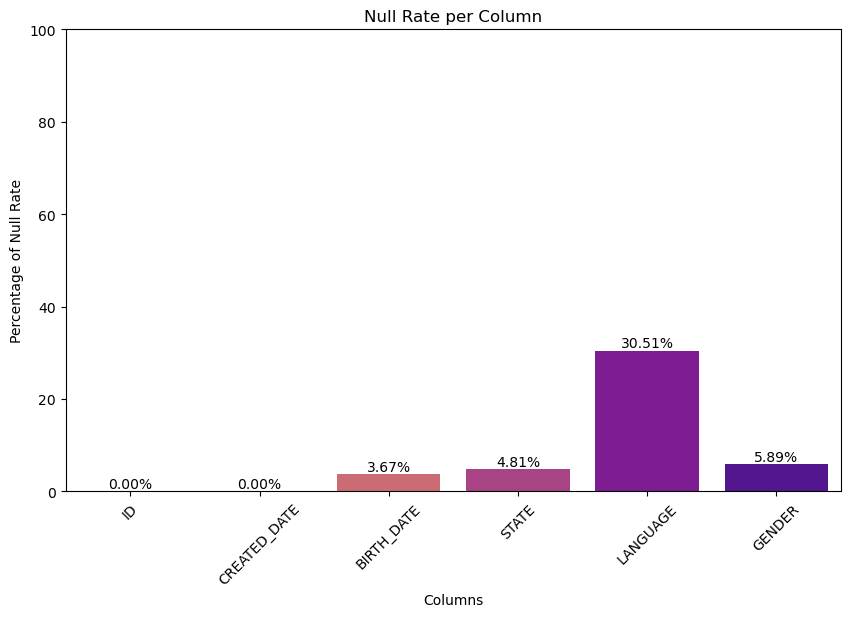

In [82]:
# plot null rate

# Calculate null rate as a percentage
null_rate = user.isnull().mean() * 100

# Create bar plot for null rate
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=null_rate.index, y=null_rate.values, hue=null_rate.index, palette="plasma_r")

plt.ylabel('Percentage of Null Rate')
plt.xlabel('Columns')
plt.title('Null Rate per Column')
plt.ylim(0, 100)  # Limit the y-axis from 0 to 100 for better readability
plt.xticks(rotation=45)

# Add numerical values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

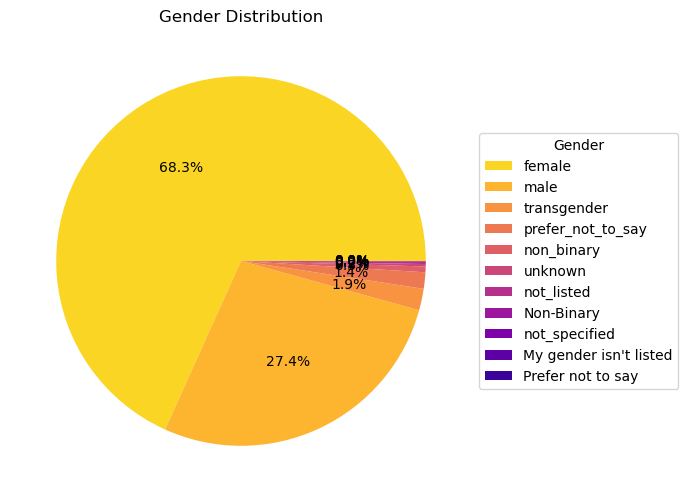

In [81]:
# Plot gender distribution
gender_counts = user['GENDER'].value_counts()

# Plotting a pie chart using Matplotlib with a Seaborn color palette (plasma)
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=None, autopct='%1.1f%%', 
        colors=sns.color_palette("plasma_r", len(gender_counts)))

# Add a legend on the right side
plt.legend(gender_counts.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Gender Distribution")
plt.show()

#### Findings

- **Missing Values**: Missing data is present in several fields, including `LANGUAGE`, `BIRTH_DATE`, `GENDER`, and `STATE`.


- **Data Type Issues**: 
    - Both `CREATED_DATE` and `BIRTH_DATE` should ideally be in date format for accurate time-based analysis.


- **Panel User Bias**: Assuming this sample represents all Fetch users, it’s possible the data skews female, as 68% of users are women. This could be like listening to a conversation with more voices from one group than another, which might tilt insights unless accounted for.


### Findings Summary

#### Transaction Table

- **Missing Values**: 
  - Some missing values are present in the transaction table. Further investigation is needed to assess the extent and potential impact of these missing values on analysis.

- **BARCODE Data Type**: 
  - The `BARCODE` field is currently set as an integer, which causes it to display in scientific notation due to its length. Converting this field to `VARCHAR` would enhance readability and accuracy.

- **Column Name Confusion**: 
  - The `BARCODE` column name might be reconsidered, as it may not fully describe the identifier’s purpose. Renaming it to something more descriptive, like `PRODUCT_ID`, could improve clarity.

- **Duplication**: 
  - The transaction table contains approximately half duplicate entries, which might affect analysis accuracy. 
  
  (Assuming this is a subset of the data, we may not need to account for potential category bias.)

---

#### Product Table

- **Missing Values**:
  - **Product Barcode**: Approximately 0.5% of `BARCODE` values are missing. This is significant because `BARCODE` serves as the unique product identifier.
  - **Manufacturer and Brand**: Around 27% of values in the `MANUFACTURER` and `BRAND` fields are missing. This is concerning, as these fields are essential for marketing, product, transaction, and user behavior analyses.
  - **CATEGORY_4**: Although 92% of `CATEGORY_4` values are missing, this is less critical since category details are largely captured in `CATEGORY_1` and `CATEGORY_2`, both of which have null rates below 1%.

- **Inconsistent Null Values**:
  - Inconsistencies are present in how null values are represented, especially in the `MANUFACTURER` field where some nulls are recorded as `"NONE"`. Standardizing this representation is recommended to avoid inaccuracies in null rate assessments.

- **Duplication**: 
  - The product table contains duplicate entries. Given that each product entry should ideally be unique, it may be beneficial to remove these duplicates.

---

#### User Table

- **Missing Values**: 
  - Missing data exists in several fields, including `LANGUAGE`, `BIRTH_DATE`, `GENDER`, and `STATE`, which could affect demographic and behavioral analyses.

- **Data Type Issues**: 
  - The `CREATED_DATE` and `BIRTH_DATE` fields should ideally be in date format to enable accurate time-based analyses.

- **Panel User Bias**: 
  - Assuming this dataset represents all Fetch users, there may be a gender bias, as 68% of users are female. This imbalance could influence insights and should be accounted for in any generalized conclusions.


## 2. SQL queries

### 2.1 What are the top 5 brands by receipts scanned among users 21 and over?

**Assumptions:**

We assume that "scanned receipts" refers to entries in the transaction table, where each receipt is identified by a unique RECEIPT_ID.

In [103]:
sqldf('''
SELECT 
    p.BRAND, 
    COUNT(t.RECEIPT_ID) AS receipt_count
FROM txn t
    JOIN pdt p ON t.BARCODE = p.BARCODE
    JOIN user u ON t.USER_ID = u.ID
WHERE 
    (strftime('%Y', 'now') - strftime('%Y', u.BIRTH_DATE)) >= 21
GROUP BY 
    p.BRAND
ORDER BY 
    receipt_count DESC
LIMIT 5;
''')


,BRAND,receipt_count
0,NERDS CANDY,6
1,DOVE,6
2,None,6
3,TRIDENT,4
4,SOUR PATCH KIDS,4


### 2.2 What is the percentage of sales in the Health & Wellness category by generation?

**Assumptions:**  

- We define generations based on user age groups: Gen Z (18-24), Millennials (25-40), Gen X (41-56), and Baby Boomers (57+).
- "Health & Wellness" is identified in CATEGORY_1


In [101]:
sqldf('''
SELECT 
    CASE 
        WHEN (strftime('%Y', 'now') - strftime('%Y', u.BIRTH_DATE)) BETWEEN 18 AND 24 THEN 'Gen Z'
        WHEN (strftime('%Y', 'now') - strftime('%Y', u.BIRTH_DATE)) BETWEEN 25 AND 40 THEN 'Millennials'
        WHEN (strftime('%Y', 'now') - strftime('%Y', u.BIRTH_DATE)) BETWEEN 41 AND 56 THEN 'Gen X'
        ELSE 'Baby Boomers' 
    END AS generation,
    SUM(t.FINAL_SALE) * 100.0 / (SELECT SUM(FINAL_SALE) FROM txn ) AS health_wellness_sales_percentage
FROM 
    txn t
    JOIN pdt p ON t.BARCODE = p.BARCODE
    JOIN user u ON t.USER_ID = u.ID
WHERE 
    p.CATEGORY_1 = 'Health & Wellness'
GROUP BY 
    generation
''')


,generation,health_wellness_sales_percentage
0,Baby Boomers,0.055269
1,Gen X,0.034164
2,Millennials,0.021082


### 2.3 Who are Fetch’s power users?

**Assumptions:**

We define "power users" as those who frequently make transactions, say, more than a specific threshold of transactions per month, or those who have the highest cumulative FINAL_SALE.

In [105]:
sqldf('''
SELECT 
    t.USER_ID, 
    COUNT(t.RECEIPT_ID) AS transaction_count, 
    SUM(t.FINAL_SALE) AS total_spent
FROM 
    txn t
GROUP BY 
    t.USER_ID
HAVING 
    COUNT(t.RECEIPT_ID) > 10 OR SUM(t.FINAL_SALE) > 1000
ORDER BY 
    total_spent DESC;
''')

,USER_ID,transaction_count,total_spent
0,60a5363facc00d347abadc8e,14,101.97
1,653a0f40909604bae9071473,12,84.78
2,61545c3b504f3536dc3423b6,12,81.73
3,5d77d06b0d1bff4316a3ef47,12,60.73
4,62099fee0ede521c349b0cb3,12,60.32
5,64e62de5ca929250373e6cf5,22,57.65
6,6240f64ee073a81bcca57670,12,57.33
7,605a982894a5c74ba439e5ab,12,56.52
8,62925c1be942f00613f7365e,20,49.87
9,65d4915916cc391732127174,12,48.77


## 3. Communicate with Stakeholders

Hi [Product/Business Leader’s Name],

After analyzing the recent data sample, I wanted to share some observations that may help guide our next steps. Here are the key takeaways:

### Data Quality Issues:
1. **Transaction Data**: We noticed missing values in the transaction table and duplication across roughly half the entries, which could affect the reliability of any analyses.
2. **Product Table**: Critical fields, such as `MANUFACTURER` and `BRAND`, have around 27% missing values. The `BARCODE` field is also occasionally missing (0.5%) and is currently set as an integer, which creates display issues (e.g., scientific notation) due to its length. Converting it to a `VARCHAR` format would improve readability.
3. **User Data**: Missing demographic fields, including `LANGUAGE`, `BIRTH_DATE`, `GENDER`, and `STATE`, could impact segmentation or demographic insights. Additionally, our user base skews heavily female (68%), suggesting potential gender bias if this sample represents the full user population.

### Key Insight:
An interesting finding from our analysis is that Baby Boomers have the highest percentage of sales in the Health & Wellness category (at 0.06% of total sales), surpassing other generations. This may indicate a unique interest in wellness products among this age group, which could inform targeted marketing strategies.

### Next Steps:
To fully leverage this data, we need further clarification on a few points:
1. **Data Completeness**: Could we confirm if this data sample is representative of all users? Understanding this will help us assess the potential impact of demographic bias.
2. **Missing Values**: Additional context on missing values (e.g., why certain fields are consistently blank) would aid in determining if we should exclude or estimate these values in analysis.
3. **Duplication**: Are duplicate entries expected within the transaction table, or should they be cleaned out for accurate reporting?

These insights and next steps will allow us to conduct more accurate, representative analyses. Let me know if there’s someone I can connect with for more details.

Thank you,  
Danhong
